# Lightsheet PSFs

This is an example of using the `psfmodels.tot_psf()` function to simulate the total system PSF (excitation x detection) that would be observed on a light sheet microscope (currently, with strictly orthogonal illumination and detection).  PSFs can be simulated using `psfmodels.vectorial_psf`, `psfmodels.scalar_psf` or the scalar model from [MicroscPSF-Py](https://github.com/MicroscPSF/MicroscPSF-Py) `gLXYZFocalScan`, by setting the `psf_func` argument.  It allows for simulating offsets between in the sheet and the detection plane in Z (`z_offset`) – such as might be observed with a defocused lightsheet – as well as misalignment along the propogration direction of the sheet (`x_offset`), such as might be observed with a point source on the periphery of the field of view.

In [43]:
import psfmodels as psfm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import PowerNorm

try:
    import microscPSF.microscPSF as msPSF
except ImportError:
    # !pip install MicroscPSF-Py
    print('Could not import MicroscPSF-Py, run or uncomment "!pip install MicroscPSF-Py" to install')
    raise


# simulating a basic light sheet PSF

Wavelength: 488/525nm
Ex NA: 0.4; Em NA: 1.1
Defocus: 0 microns



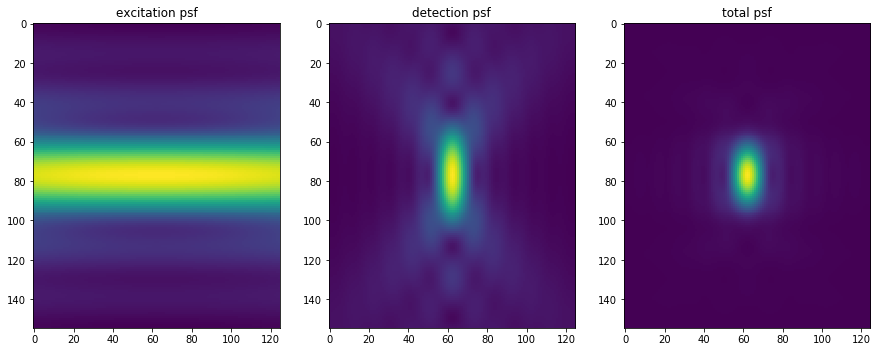

In [51]:
water_lens = {
    'ni0': 1.33, # immersion medium RI design value
    'ni': 1.33,  # immersion medium RI experimental value
    'ns': 1.33,  # specimen refractive index
    'tg': 0, # microns, coverslip thickness
    'tg0': 0 # microns, coverslip thickness design value
}
ex_lens = {**water_lens, 'NA': 0.4}
ex_wvl = 0.488
em_lens = {**water_lens, 'NA': 1.1}
em_wvl = 0.525

dxy = 0.025
dz = dxy
nx = 125
nz = 155
# mismatch between the focal point of the excitation beam
# and the point source, along the propogation direction
# of the excitation beam
x_offset = 0

# mismatch between the axial position of the excitation
# and the detection plane, with respect to the detection lens
z_offset = 0

# The psf model to use
# can be any of {'vectorial', 'scalar', or 'microscpsf'}
func = 'vectorial'

# the main function
ex_psf, em_psf, tot_psf = psfm.tot_psf(nx=nx, nz=nz, dxy=dxy, dz=dz, pz=0,
                                       x_offset=x_offset, z_offset=z_offset,
                                       ex_wvl = ex_wvl, em_wvl = em_wvl,
                                       ex_params=ex_lens, em_params=em_lens,
                                       psf_func=func)

fig, (a1,a2,a3) = plt.subplots(1,3, figsize=(15,7))
a1.imshow(ex_psf, norm=PowerNorm(gamma=0.6))
a2.imshow(em_psf[:, nx//2], norm=PowerNorm(gamma=0.6))
a3.imshow(tot_psf[:, nx//2], norm=PowerNorm(gamma=0.6))
a1.set_title('excitation psf')
a2.set_title('detection psf')
a3.set_title('total psf')
print(f"Wavelength: {int(ex_wvl*1000)}/{int(em_wvl*1000)}nm")
print(f"Ex NA: {ex_lens['NA']}; Em NA: {em_lens['NA']}")
print(f"Defocus: {z_offset} microns\n")

## simulate varying combinations of sheet defocus and misalignment

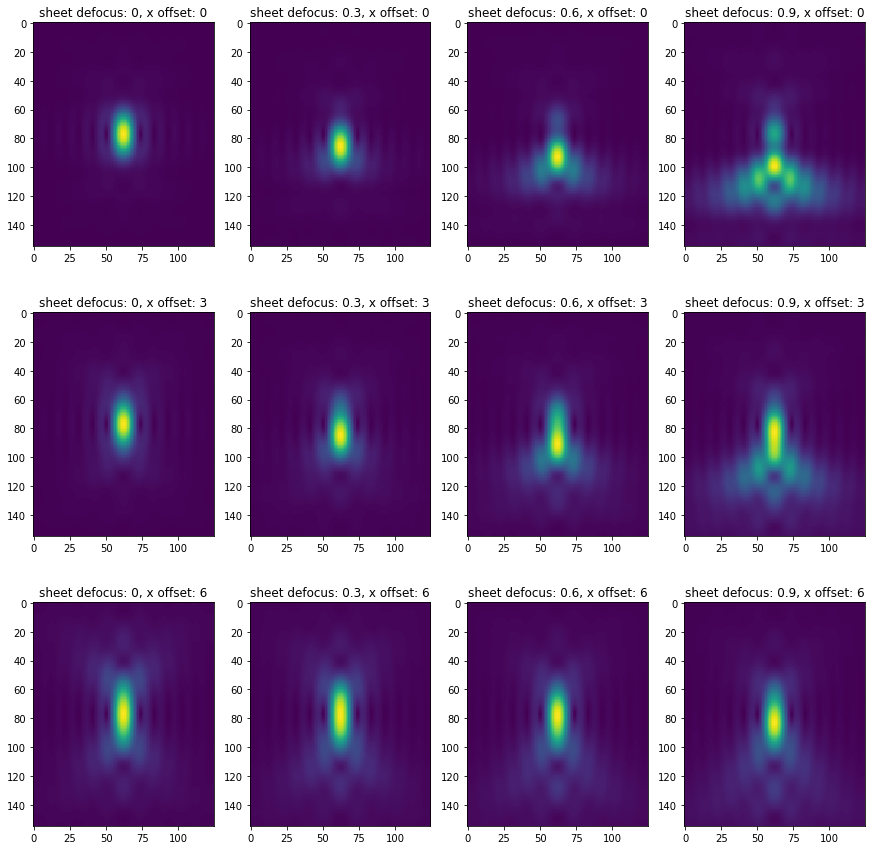

In [48]:
func = 'microscpsf'  # since it's much faster ...
zos = [0, 0.3, 0.6, 0.9]
xos = [0, 3, 6]
out = np.empty((len(zos), len(xos), nz ,nx))
fig, axs = plt.subplots(len(xos), len(zos), figsize=(len(xos)*4, len(zos)*3), constrained_layout=True)
for z, zo in enumerate(zos):
    for x, xo in enumerate(xos):
        _, _, tot = psfm.tot_psf(nx=nx, nz=nz, dxy=dxy, dz=dz, pz=0,
                                       x_offset=xo, z_offset=zo,
                                       ex_wvl = ex_wvl, em_wvl = em_wvl,
                                       ex_params=ex_lens, em_params=em_lens,
                                       psf_func=func)
        axs[x, z].imshow(tot[:, nx//2], norm=PowerNorm(gamma=0.6))
        axs[x, z].set_title(f"sheet defocus: {zo}, x offset: {xo}")
